#### Problem Statement

##### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

The idea of the project is to find out the properties of a product, and store which impacts the sales of a product. Let’s think about some of the analysis that can be done and come up with certain hypothesis. For this we need to think what are the factor that could makeimapact in sales of product.

#### Hypothesis Generation

Store Level:

1. City : It really matter where the store is located. If It is located in urban there is higher chance of more sales because of more people more demand and also higher income levels of the people.


2. Store Capacity : Genreally stores with large size consists of all sort of products as a one stop shop so there is more sales as people prefer getting everything from one place.


3. Marketing Strategies: Those stores with good marketing rules can make higher sales as they know how to attract more customer


4. Location : Stores situated at the better marketplace where customer can access products easily makes more sales.


5. Competitors : Stores that are near to each other and are established at same year will make less sales because of more competition.


6. Ambiance : Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

Product Level:

1. Product Brand : Branded products should have higher sales because of higher trust developed in the customer.


2. Packaging : Products with good packaging can attract customers and sell more.


3. Daily Products : Generally, daily use product are more sell than or products. Almose all customer has to buy for their daily necessity. so they have higher tendency to sell as compared to the specific use products.


4. Display : Products that are kept at more seen place has higher tendency to buy. so products near the money counter get selled more than at corner shelve.


5. Advertising: Better advertising of products in the store will should higher sales in most cases.


6. Promotional Offers: Products accompanied with attractive offers and discounts will sell more. Good offer can increase sales of any products like rocket.

#### loading Packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv("Train.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test = pd.read_csv("Test.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Here we have train and test dataset separately. We will combine both the dataframe to crate one and do  all the data  analysis and visualization in that one dataframe. We donot have to do it separately for train and test dataframe.

In [4]:
train.shape

(8523, 12)

In [5]:
test.shape


(5681, 11)

Lets combine them into a dataframe ‘data’ with a ‘source’ column specifying where each observation belongs.

In [6]:
train['source']='train'
test['source']='test'
data = pd.concat([train,test], ignore_index=True, sort  = False)
print( train.shape ,test.shape,data.shape)

(8523, 13) (5681, 12) (14204, 13)


#### Data Structure and Content

In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

Here Item_Outlet_Sales is the output feature/ label so the missing values are the test output. We donot need to change that and we will impute for missing values in the Item_Weight and Outlet_Size.

In [8]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Some of the points to note from the above:
+ the minimum value of the Item_Visibility is 0. This doesnt make sense because if a product is sold then it cannot have 0 item visibility. so there must be some product with 0 item sold.
+ Instead of showing dates of store in Outlet_Establishment_Years. We will show how old particular store is. this can impact sales of the product.
+ Item_Weight count is is low due to lots of missing value. 

#### Exploratory Data Analysis

First of all , lets see how many unique data are present in the dataset.

In [9]:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

We find there are lots of dublicates item in the dataset. One of the main reason is because the same products can be available in many stores. Curious fact is that there seems to be 1562 unique items only available in one single store.

#### Univariate Analysis

To get an idea of the distribution of numerical variables, histogram are an excellent starting point.
Lets look at the disribution of the target variable, Item_Outlet_Sales

Text(0.5,1,'Item_Outlet_Sales Distribution')

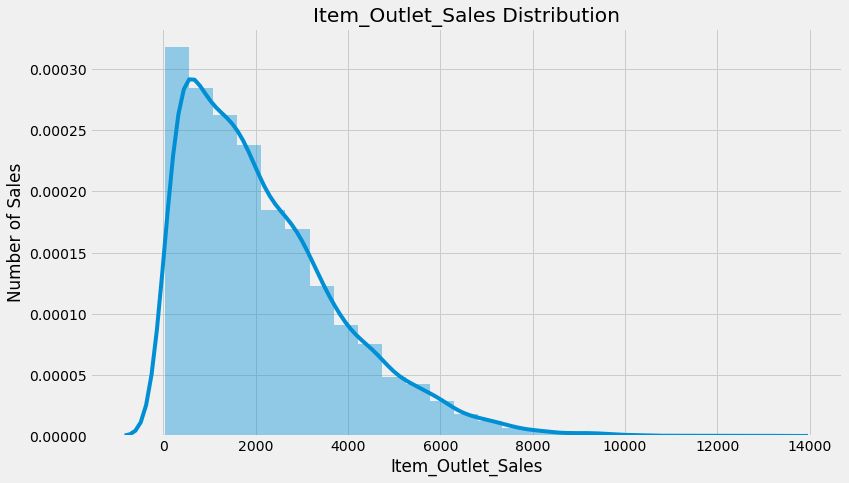

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

From the graph we can see that the item_Outlet_Sales is right skewed. Also I only used train data because test data doesnt have target variable.

Lets see which of the features are numerical predictor

In [11]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

Lets find the correlation between numerical predictors and target variables with train dataset

In [12]:
features = train.select_dtypes(include=[np.number])
corr = features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [13]:
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


This shows that Item_Outlet_Sales is more in dependent with Item_MRP

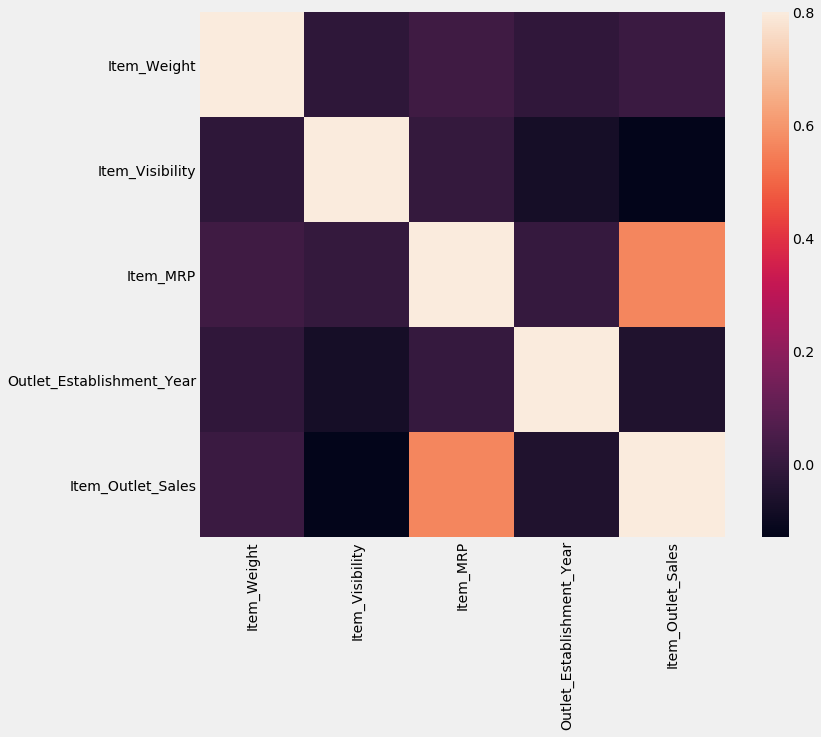

In [14]:
#correlation matrix

f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=.8, square = True)

From the current numeric variables we can observe that the Item_Visibility is the feature with the lowest correlation with our target variable. Therefore, the less visible the product is in the store the higher the price will be.
since this is not an expected behaviour and we should investigate. Moreover, this feature has a negative correlation with all of the other features.

For categorical variables, bar charts and frequency counts are the natural counterparts to histograms. 

For Item_Fat_Content If we see, there are 2 possible choice : low fat and regular but due to different way of writing it has created 5 choices. we should correct this.

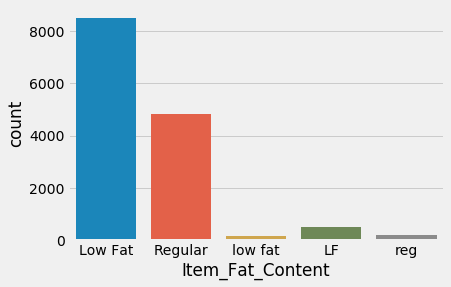

In [15]:
sns.countplot(data.Item_Fat_Content)

In [16]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(['low fat'], ['Low Fat']) 
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(['LF'], ['Low Fat']) 
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(['reg'], ['Regular']) 

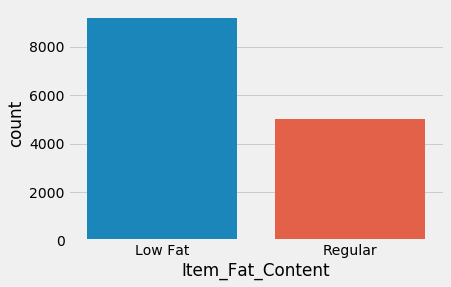

In [17]:
sns.countplot(data.Item_Fat_Content)

Looking at the list of Item_Type we see there are sixteen different types


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

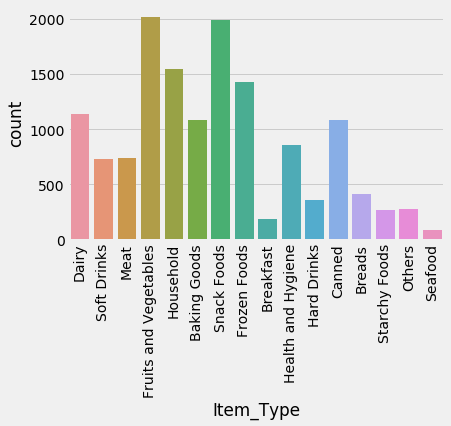

In [18]:
sns.countplot(data.Item_Type)
plt.xticks(rotation=90)

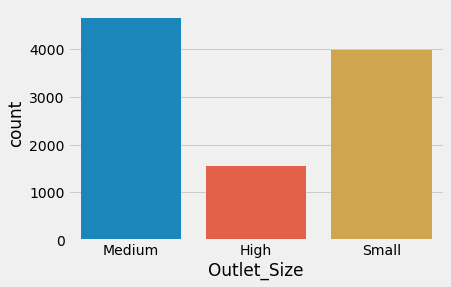

In [19]:
sns.countplot(data.Outlet_Size)

There seems to be low number of stores that has size "high" category. Most of the store seems to be either small or medium. But it quite interesting to see if how size of stores relates to the target variable.

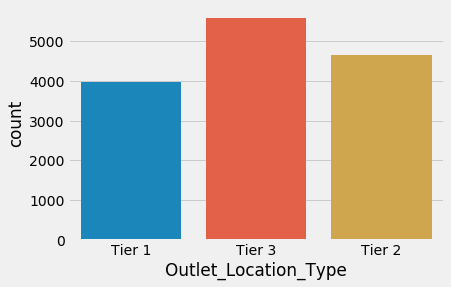

In [20]:
sns.countplot(data.Outlet_Location_Type)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

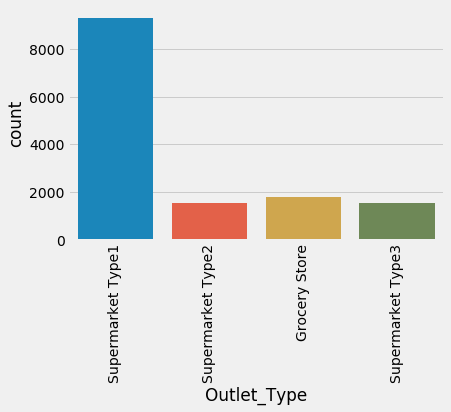

In [21]:
sns.countplot(data.Outlet_Type)
plt.xticks(rotation=90)

It looks like Supermarket Type2 , Grocery Store and Supermarket Type3 all have low expression in this graph. Maybe we can create a single category with all of the three. 

#### Bivariate Analysis

We have seen individual analysis of predictors, Now we will focus on relationships between predictors and target variable and also between predictors.

In [22]:
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

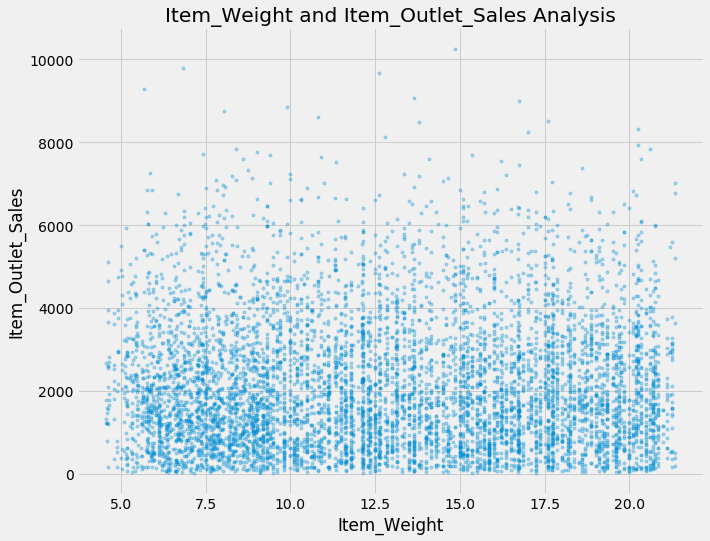

In [23]:
plt.figure(figsize=(10,8))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight,train["Item_Outlet_Sales"],'.',alpha=0.3)

We have seen from heatmap  that Item weight has low correlation from our target variable and this graph shows that there is not any dependencies in graph whether the product weight increase or decrease.

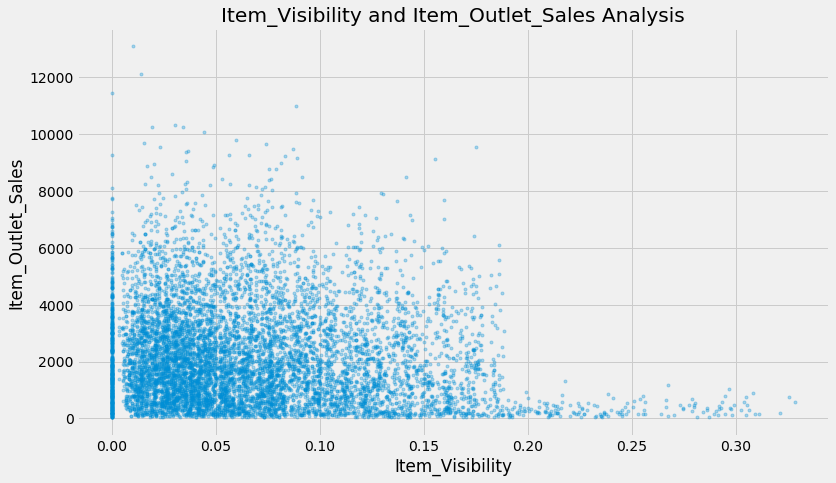

In [24]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Visibility and Item_Outlet_Sales Analysis')
plt.plot(train.Item_Visibility, train['Item_Outlet_Sales'],'.', alpha = 0.3)

Product Visibility do bring impoact on the sales of that product. The item that is keep at store door is sold more that the product which is at the corner.Also the location of store adds more item visibility and hence increase the item sales .

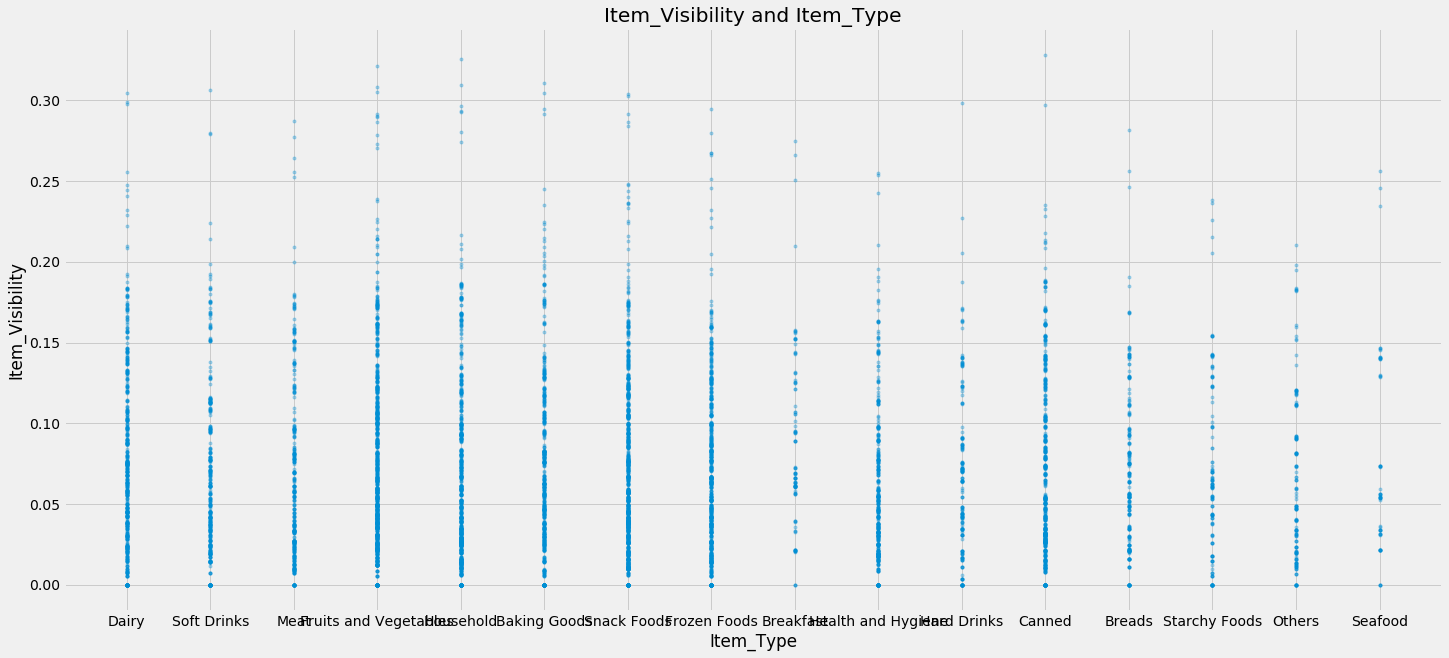

In [25]:
plt.figure(figsize=(22,10))
plt.xlabel("Item_Type")
plt.ylabel('Item_Visibility')
plt.title('Item_Visibility and Item_Type')
plt.plot(train.Item_Type, train['Item_Visibility'],'.', alpha = 0.3)

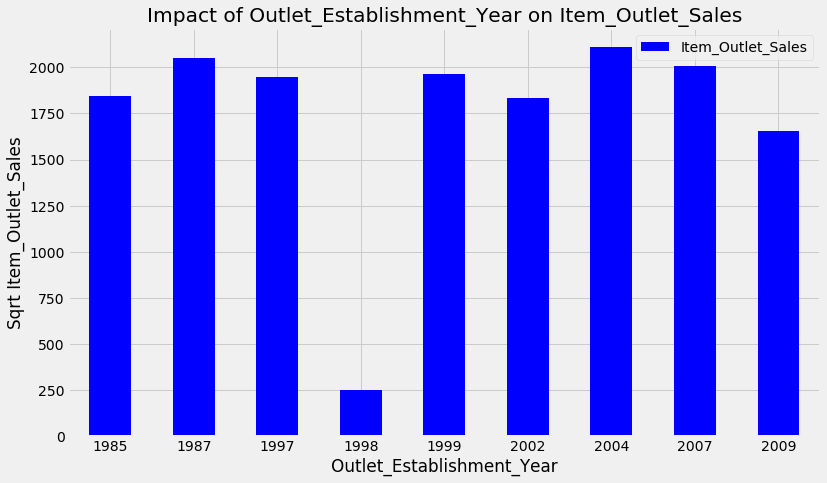

In [26]:
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

There isnot any relation between year of establishment and item sales. But 1998 has low no of sales maybe because low mo of stores were opened at that time.

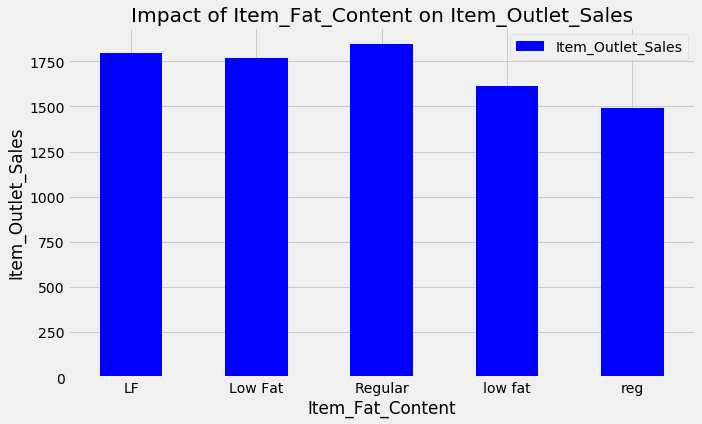

In [27]:
Item_Fat_Content_pivot = \
train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(10,6))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Daily use products should have a higher tendency to sell as compared to the specific use products. “Low Fat” products seem to have higher sales values than “Regular” products.

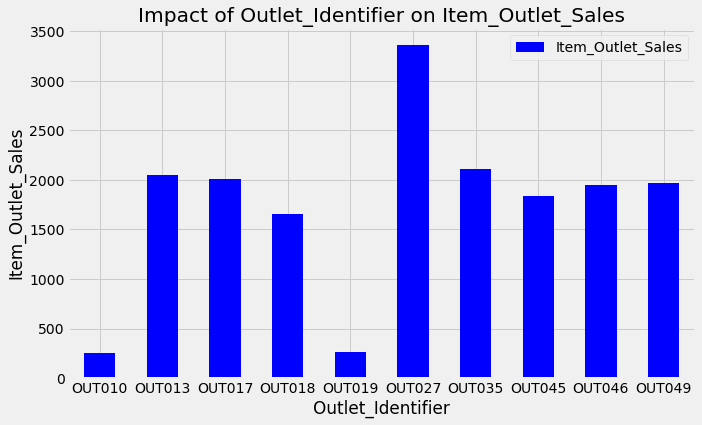

In [28]:
Outlet_Identifier_pivot = train.pivot_table(index='Outlet_Identifier', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(10,6))
plt.xlabel('Outlet_Identifier')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Identifier on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()


In [29]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


From the above bar chart, we see that thr groceries (“OUT010”, “OUT019”) have the lowest sales results which is expected followed by the Supermarket Type 2 (“OUT018”). Curiously, most stores are of type Supermarket Type1 of size “High” and do not have the best results. The best results belong to “Out027” which is a “Medium” size Supermarket Type 3.

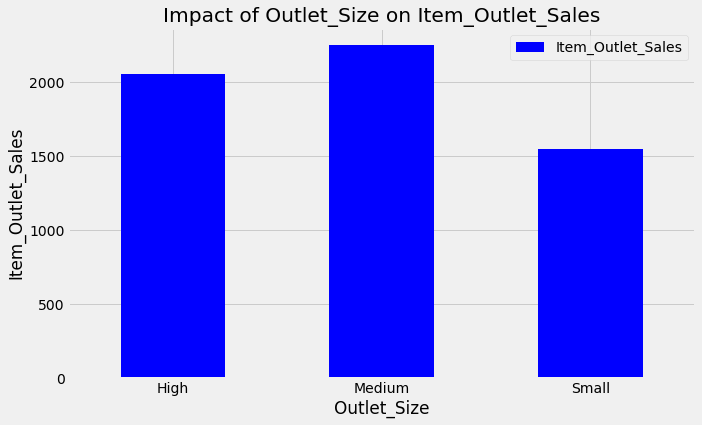

In [30]:
Outlet_Size_pivot =train.pivot_table(index='Outlet_Size', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(10,6))
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Size on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()


Generally big size shops are one stop shops where all products are available like in supermart. so the item sales is larger in that shop.Curiously, consumers tend to prefer medium size stores instead of big size. As we saw in the previous section, most stores have size “Medium” but still the “High” and “Small” stores which are clearly in an inferior number can beat or even come close to their numbers.

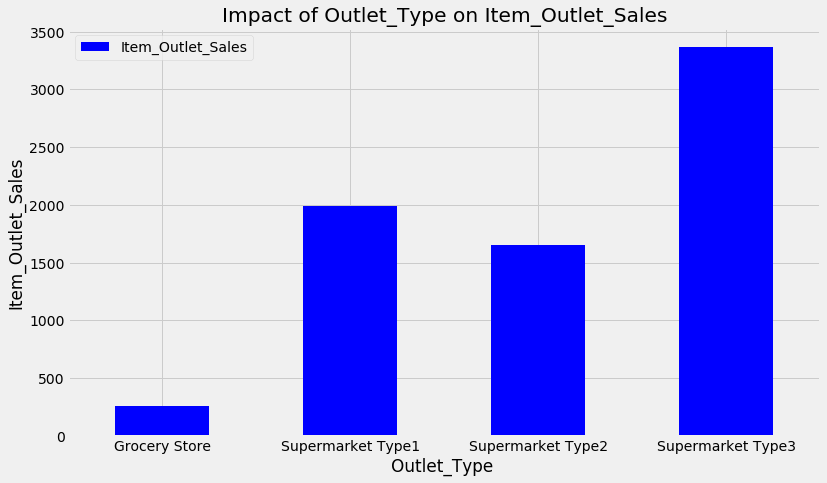

In [31]:
Outlet_Type_pivot =train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

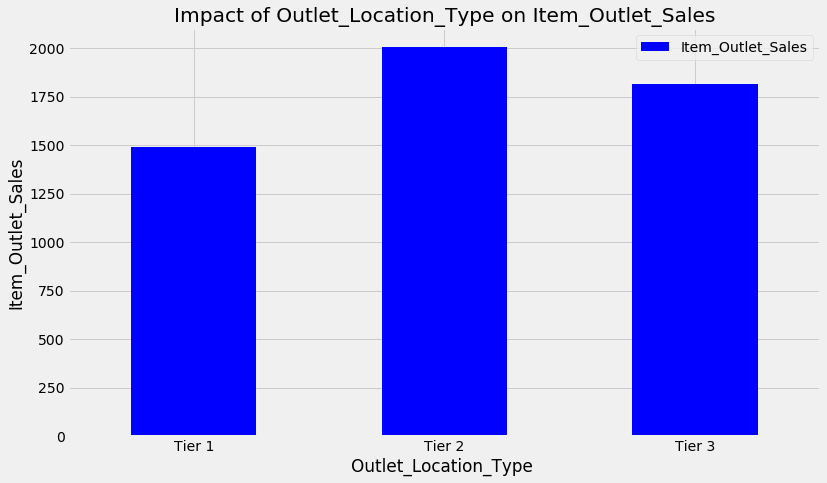

In [32]:
Outlet_Location_Type_pivot =train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Location_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()


From the graph as we can see tier 2 and 3 have more no of sales than tier  1. this means there are more no of stores in tier 2 and 3 cities than tier1.

In [33]:
train.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type',aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


#### Missing Value Treatment

We’ve seen previously on the EDA section that the Item_Weight and the Outlet_Size had missing values. Hence, for now we will impute for this missing values the mean for each corresponding variable.

In [34]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True) 

We use mode to replace the missing value in Outlet_Size since the data is categorical

In [35]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True) 

We use mean to replace the missing value in Item_Weight 

In [36]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

Item_Outlet_Sales has missing values due to test data as it is target variable

In [37]:
len(data['Item_Visibility']=='0')

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


14204

we saw that Item_Visibility had the minimum value 0, which makes no sense since every product must be visible to all clients. Let’s consider it as missing value and impute it with mean visibility of that product.

In [38]:
vis=data['Item_Visibility'].mean()

In [39]:
data['Item_Visibility']=data['Item_Visibility'].replace('0', np.nan) 

In [40]:
len(data['Item_Visibility']==np.nan)

14204

In [41]:
data['Item_Visibility'].fillna(data['Item_Visibility'].mean(), inplace=True) 

In [42]:
data['Item_Visibility'].isnull().sum()

0

In [43]:
'0' in data['Item_Visibility'].unique()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


False

#### Feature Engineering

In [44]:
#Remember the data is from 2013
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

We talked about using how long has been working instead of the date of start. Remember that the data we have is from 2013. 

In [45]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',                                                      'NC':'Non-Consumable',                                                            'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()


Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

we saw that the Item_Type variable has 16 categories which might not prove to be very useful in our analysis. So it’s a good idea to combine them. If we look closely to the Item_Identifier of each item we see that each one starts with either “FD” (Food), “DR” (Drinks) or “NC” (Non-Consumables). 

In [46]:
print(data['Item_Fat_Content'].value_counts())

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [47]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

there were some non-consumables as well and a fat-content should not be specified for them. So we can also create a separate category for such kind of observations.

#### Label Encoding

In [48]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

Since scikit-learn accepts only numerical variables, I converted all categories of nominal variables into numeric types. Also, I wanted Outlet_Identifier as a variable as well. So I created a new variable ‘Outlet’ same as Outlet_Identifier and coded that

#### Hot Encoding

In [49]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable. For example, the Item_Fat_Content has 3 categories – ‘Low Fat’, ‘Regular’ and ‘Non-Edible’. One hot coding will remove this variable and generate 3 new variables. Each will have binary numbers – 0 (if the category is not present) and 1(if category is present). This can be done using ‘get_dummies’ function of Pandas.

In [50]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
O

#### Preprocessing

In [51]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### Model Building

In [52]:
train_data = pd.read_csv('train_modified.csv')
test_data = pd.read_csv('test_modified.csv')

In [53]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,14,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,4,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,14,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,15,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,26,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [54]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDW58,20.750000,0.007565,107.8622,OUT049,14,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,FDW14,8.300000,0.038428,87.3198,OUT017,6,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,NCN55,14.600000,0.099575,241.7538,OUT010,15,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,FDQ58,7.315000,0.015388,155.0340,OUT017,6,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,FDY38,12.792854,0.118599,234.2300,OUT027,28,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [55]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import model_selection, metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    #Remember the target had been normalized
    Sq_train = (dtrain[target])**2
#Perform cross-validation:
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors],Sq_train , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Sq_train.values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

#### Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
predictors = train_data.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
modelfit(LR, train_data, test_data, predictors, target, IDcol, 'LR.csv')


Model Report
RMSE : 1.4e+07
CV Score : Mean - 9.125e+06 | Std - 1.027e+06 | Min - 7.768e+06 | Max - 1.171e+07


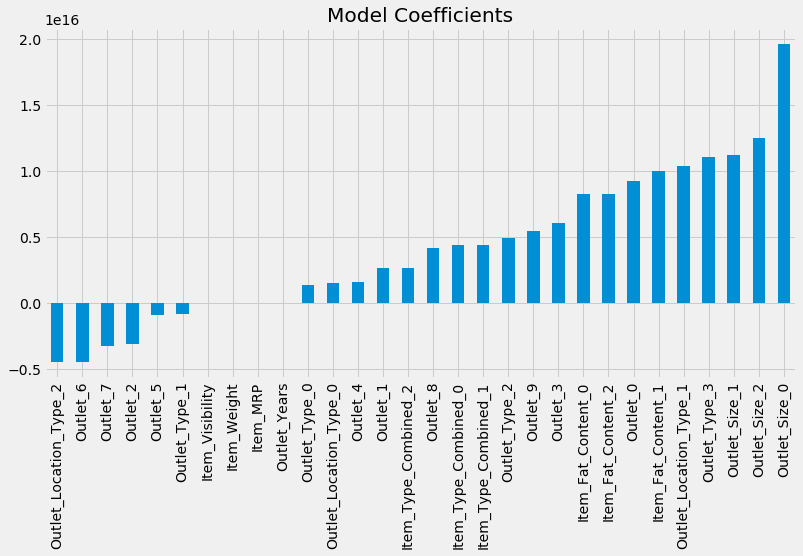

In [70]:
coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients', figsize = (12,6))

#### Regularized Linear Regression

In [57]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
modelfit(RR, train_data, test_data, predictors, target, IDcol, 'RR.csv')


Model Report
RMSE : 1.4e+07
CV Score : Mean - 9.125e+06 | Std - 1.047e+06 | Min - 7.749e+06 | Max - 1.175e+07


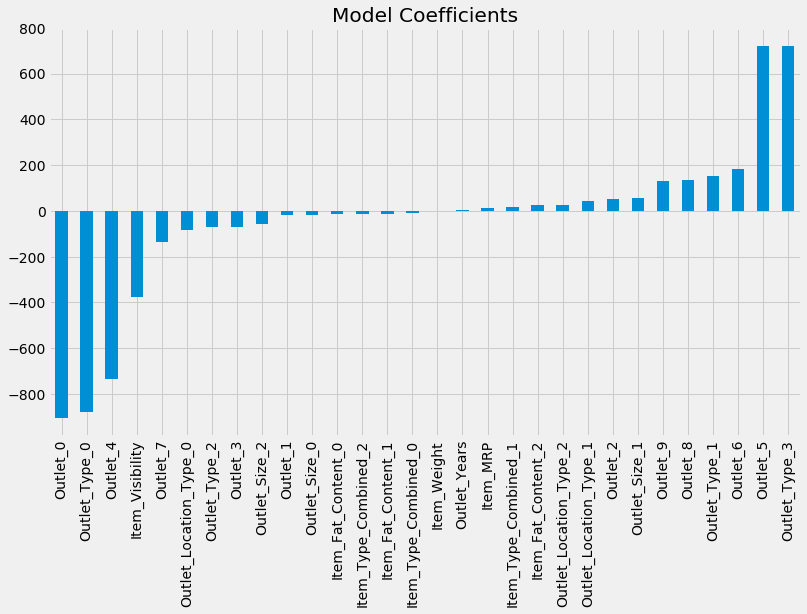

In [69]:
coef1 = pd.Series(RR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients', figsize = (12,7))

#### Decision Tree Model

In [63]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_data, test_data, predictors, target, IDcol, 'DT.csv')


Model Report
RMSE : 1.4e+07
CV Score : Mean - 8.601e+06 | Std - 8.754e+05 | Min - 7.29e+06 | Max - 1.064e+07


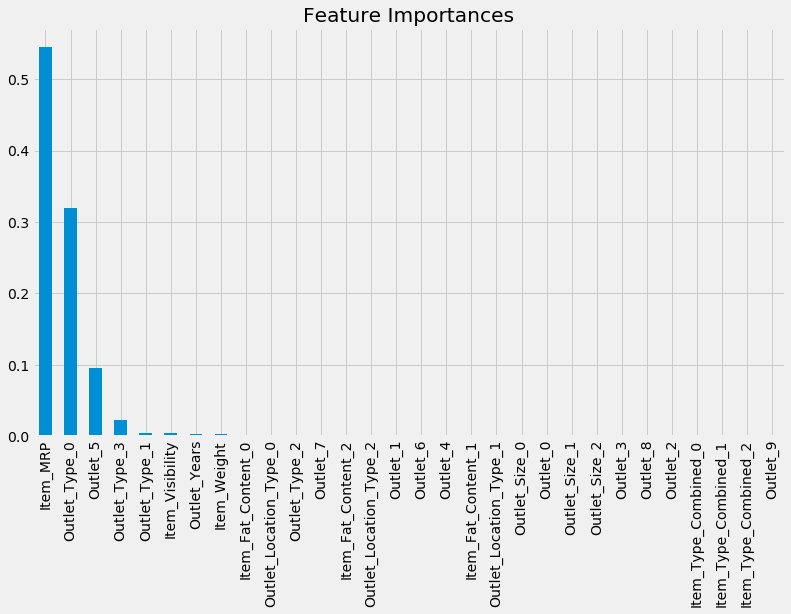

In [68]:
coef3 = pd.Series(DT.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances', figsize = (12,7))

#### Random Forest Model

In [72]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train_data, test_data, predictors, target, IDcol, 'RF.csv')


Model Report
RMSE : 1.4e+07
CV Score : Mean - 8.607e+06 | Std - 8.987e+05 | Min - 7.425e+06 | Max - 1.082e+07


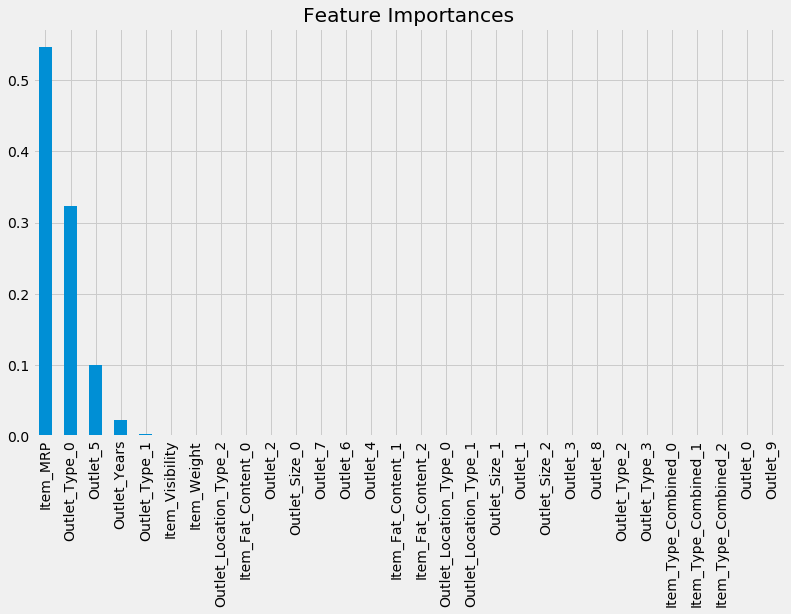

In [74]:
coef5 = pd.Series(RF.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances', figsize = (12,7))

#### XG Boost Model

In [75]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_data[predictors], train_data[target], early_stopping_rounds=5,eval_set=[(test_data[predictors], test_data[target])], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=1000, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [77]:
#Predict training set:
train_df_predictions = my_model.predict(train_data[predictors])
# make predictions
predictions = my_model.predict(test_data[predictors])
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_data[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_data[target]).values, train_df_predictions)))
IDcol.append(target)
submission = pd.DataFrame({ x: test_data[x] for x in IDcol})
submission.to_csv("merda.csv", index=False)

Mean Absolute Error : 138.04725429812186
RMSE : 1008


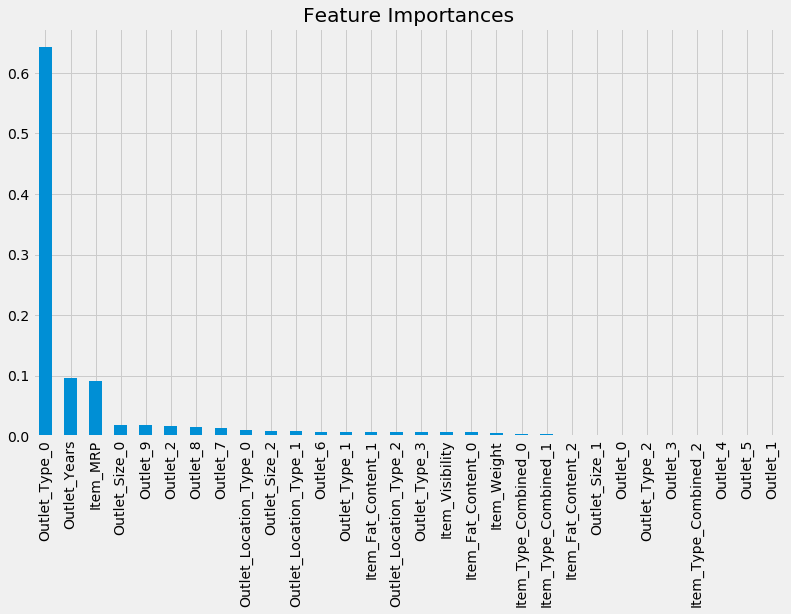

In [78]:
coef5 = pd.Series(my_model.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances', figsize = (12,7))

#### Summary

The ML algorithm that perform the best was XGBoost with RMSE = 1008.
Whatever Hypothesis we build around the product information and store  with sales of the product has give us insight about the finding the hidden information in relation between different predictors and target variable and using ML algorithms has made us able to achieve this result.

We tried with different algorithm and the target variable of test dataset is kept in different CV files for better comparison.